<a href="https://colab.research.google.com/github/FabrizioBettetti/Machine-learning/blob/main/Binary_classification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

np.int64(1)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()   #<word, index>
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])   #<index, word>
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])   #Index 0, 1, 2 reserved: offset by 3

In [6]:
import numpy as np

#Multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
train_labels.shape, test_labels.shape

((25000,), (25000,))

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
y_train.shape, y_test.shape

((25000,), (25000,))

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),   #16, 32, 64
  layers.Dense(16, activation='relu'),   #16, 32, 64
  layers.Dense(1, activation='sigmoid')   #'sigmoid', 'tanh'
])
#Last layer with sigmoid activation: ouput probabilities of positive review (class 1)

In [12]:
#Loss:
#use crossentropy when model outputs probabilities;
#binary classification;
#=> binary crossentropy

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])   #'binary_crossentropy', 'mse'

In [13]:
#Split original trainin set in validation set (first 10k samples) and partial training set (the remaining part)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6995 - loss: 0.6135 - val_accuracy: 0.8508 - val_loss: 0.4334
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8909 - loss: 0.3715 - val_accuracy: 0.8802 - val_loss: 0.3299
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9135 - loss: 0.2707 - val_accuracy: 0.8815 - val_loss: 0.2984
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9331 - loss: 0.2127 - val_accuracy: 0.8875 - val_loss: 0.2779
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9414 - loss: 0.1819 - val_accuracy: 0.8866 - val_loss: 0.2775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9509 - loss: 0.1482 - val_accuracy: 0.8778 - val_loss: 0.3068
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9567 - loss: 0.1318 - val_accuracy: 0.8853 - val_loss: 0.2905
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9691 - loss: 0.1114 - val_accuracy: 0.8797 - 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

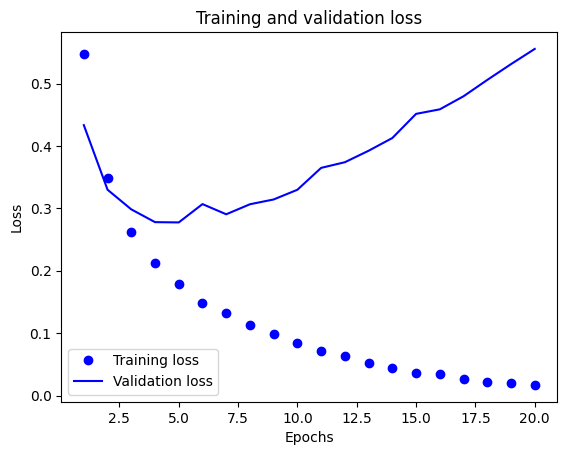

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']   #List of losses: one per epoch
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

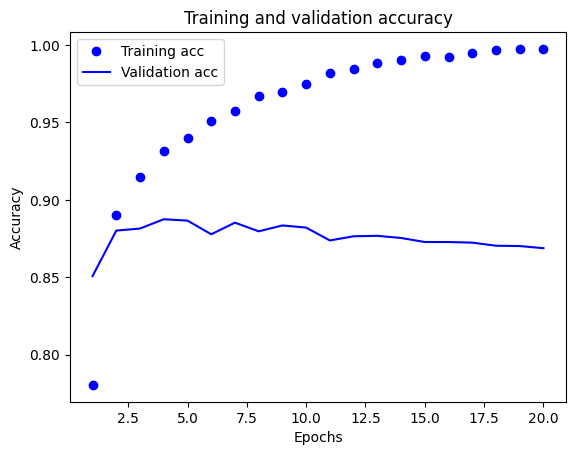

In [17]:
plt.clf()   #Clear figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Try:
*   1 and 3 hidden layers instead of 2
*   layers with 32 and 64 units
*   mse loss instead of binary crossentropy
*   tanh activation instead of relu





##Model with optimal epochs

In [18]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7354 - loss: 0.5528
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9046 - loss: 0.2810
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9250 - loss: 0.2101
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9377 - loss: 0.1797
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.2874


[0.28651168942451477, 0.8860399723052979]

In [19]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20458128],
       [0.9998977 ],
       [0.85662436],
       ...,
       [0.08464395],
       [0.07192933],
       [0.6216792 ]], dtype=float32)